In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import *
import matplotlib.patches as patches

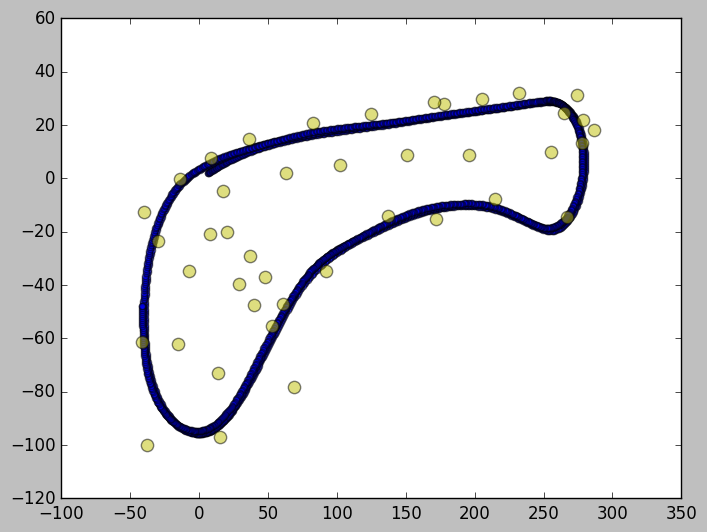

In [103]:
gt_file = "./data/gt_data.txt"
with open(gt_file) as f:
    x_gt = []
    y_gt = []
    theta_gt = []
    
    for line in f: 
        data = line.split()
        x_gt.append(data[0])
        y_gt.append(data[1])   
        theta_gt.append(data[2])   

map_file = "./data/map_data.txt"
with open(map_file) as f:
    x_map = []
    y_map = []
    
    for line in f: 
        data = line.split()
        x_map.append(data[0])
        y_map.append(data[1])   
        
        
colors = np.random.rand(len(x_map))
colors = 0.1*np.ones(len(x_map))
area = np.pi * 5**2  # 

plt.scatter(x_gt, y_gt,alpha=0.5)
plt.scatter(x_map, y_map,s=area, c="y",alpha=0.5)

plt.show()

In [14]:
import pandas as pd
gt = pd.read_table("./data/gt_data.txt", sep=" ", header=None)
gt.columns=["x","y","theta"]
gt.dtypes

best = pd.read_table("./best_particle.dat", sep=" ", header=None)
best.columns=["x","y","theta"]
best.dtypes

x        float64
y        float64
theta    float64
dtype: object

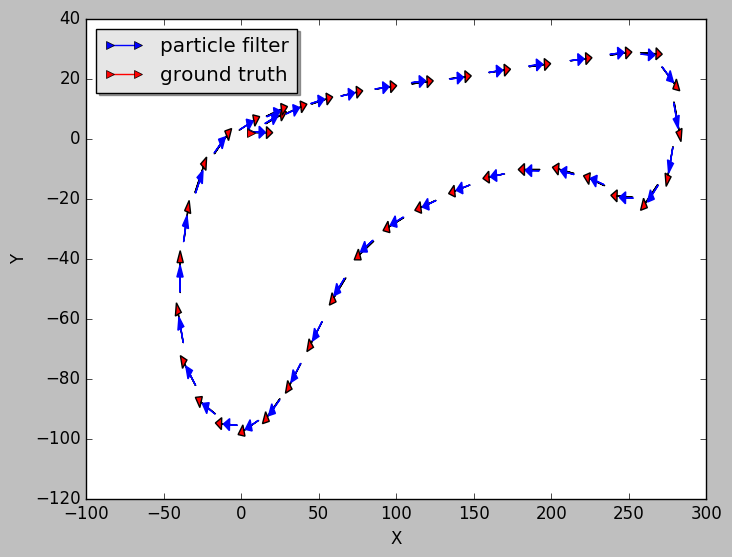

In [66]:
arrow_len=10
ax = plt.axes()
ax.set_xlim(-100,300)
ax.set_ylim(-120,40)
ax.set_xlabel("X")
ax.set_ylabel("Y")

for i in np.arange(0, len(gt.x)/3, 20):
    ax.arrow(gt.x[i],gt.y[i],arrow_len * cos(gt.theta[i]),arrow_len* sin(gt.theta[i]), 
             head_width=4, 
             head_length=4, 
             fc='r', 
             ec='k')
    
    ax.arrow(best.x[i],best.y[i],0.5*arrow_len * cos(best.theta[i]),0.5*arrow_len* sin(best.theta[i]), 
         head_width=4, 
         head_length=4, 
         fc='b', 
         ec='b')
    
ax.plot(best.x[0],best.y[0],'b->',label = "particle filter")
ax.plot(gt.x[0],gt.y[0],'r->',label = "ground truth")

# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show('foo.gif')


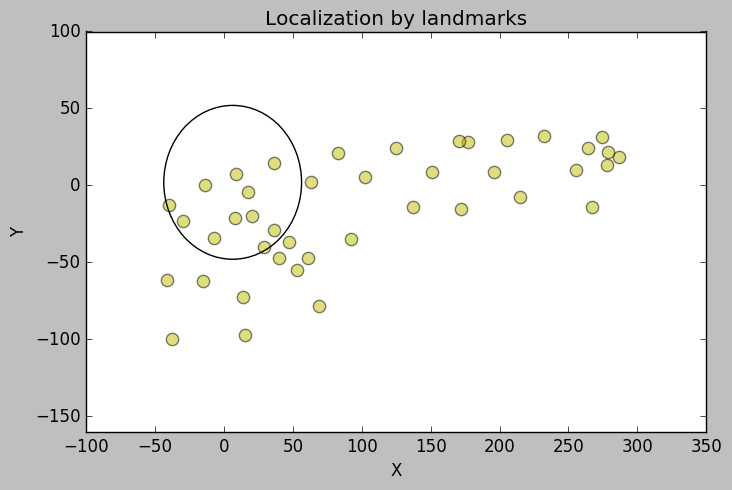

In [118]:
matplotlib.rcdefaults()

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle

nframes_max=40    
sensorrange=50
def animate(nframe):    
    arrow_len=10
    ax = plt.axes()
    ax.clear() 
    ax.set_xlim(-100,350)
    ax.set_ylim(-160,100)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    nlast=int(nframe/nframes_max * len(gt.x)/3)
    for i in np.arange(0,nlast, 20):
        ax.arrow(gt.x[i],gt.y[i],arrow_len * cos(gt.theta[i]),arrow_len* sin(gt.theta[i]), 
                 head_width=4, 
                 head_length=4, 
                 fc='r', 
                 ec='k')

        ax.arrow(best.x[i],best.y[i],0.5*arrow_len * cos(best.theta[i]),0.5*arrow_len* sin(best.theta[i]), 
             head_width=4, 
             head_length=4, 
             fc='b', 
             ec='b')
        
    circ = Circle((gt.x[nlast],gt.y[nlast]),sensorrange)
    circ.set_facecolor("none")
    ax.add_patch(circ)
        
    plt.scatter(x_map, y_map,s=area, c="y",alpha=0.5)
    plt.title("Localization by landmarks")
    
    
fig = plt.figure(figsize=(8,5))  

anim = animation.FuncAnimation(fig, animate, frames=nframes_max)
anim.save('localization.gif', writer='imagemagick', fps=4);
